In [15]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

Load the Data

In [2]:
#Load the dataset
data = pd.read_csv('event_reg.csv')

In [3]:
#Display the first 5 rows of the dataset
data.head(5)

,ID,Department,College,Preferred_Date,First_Interest,Second_Interest,Third_Interest,Fourth_Interest,Physical_Participation,Language_Preference,Participated,TAScore
0,1,CSE,DKTE,25 June 2020,Python Programming and Data Science Foundations,Web Development,NaN,NaN,Yes,Hindi,No,NaN
1,2,IT,DKTE,25 June 2020,Python Programming and Data Science Foundations,Web Development,NaN,NaN,Yes,Marathi,Yes,75.0
2,3,CSE,DKTE,30 June 2020,Machine Learning,Python Programming and Data Science Foundations,NaN,NaN,Yes,English,No,NaN
3,4,CSE,DKTE,25 June 2020,Machine Learning,Python Programming and Data Science Foundations,NaN,NaN,Yes,English,Yes,80.0
4,5,ME,DKTE,25 June 2020,Python Programming and Data Science Foundations,Web Development,NaN,NaN,Yes,English,Yes,90.0


In [4]:
#Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      200 non-null    int64  
 1   Department              200 non-null    object 
 2   College                 200 non-null    object 
 3   Preferred_Date          200 non-null    object 
 4   First_Interest          200 non-null    object 
 5   Second_Interest         200 non-null    object 
 6   Third_Interest          167 non-null    object 
 7   Fourth_Interest         142 non-null    object 
 8   Physical_Participation  200 non-null    object 
 9   Language_Preference     200 non-null    object 
 10  Participated            200 non-null    object 
 11  TAScore                 140 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 18.9+ KB


Initial Data Overview

The dataset contains 200 entries and 12 columns:

1. ID: Unique identifier for each record.
2. Department: The department of the student.
3. College: The college of the student.
4. Preferred_Date: The preferred date for participation.
5. First_Interest: The first area of interest.
6. Second_Interest: The second area of interest.
7. Third_Interest: The third area of interest (missing values present).
8. Fourth_Interest: The fourth area of interest (missing values present).
9. Physical_Participation: Whether the student prefers physical participation.
10. Language_Preference: The preferred language for the event.
11. Participated: Whether the student participated in the event (target variable).
12. TAScore: The student's score (missing values present).

Exploratory Data Analysis (EDA)

Let's summarize the findings and perform some visualizations to understand the distribution and relationships within the data.

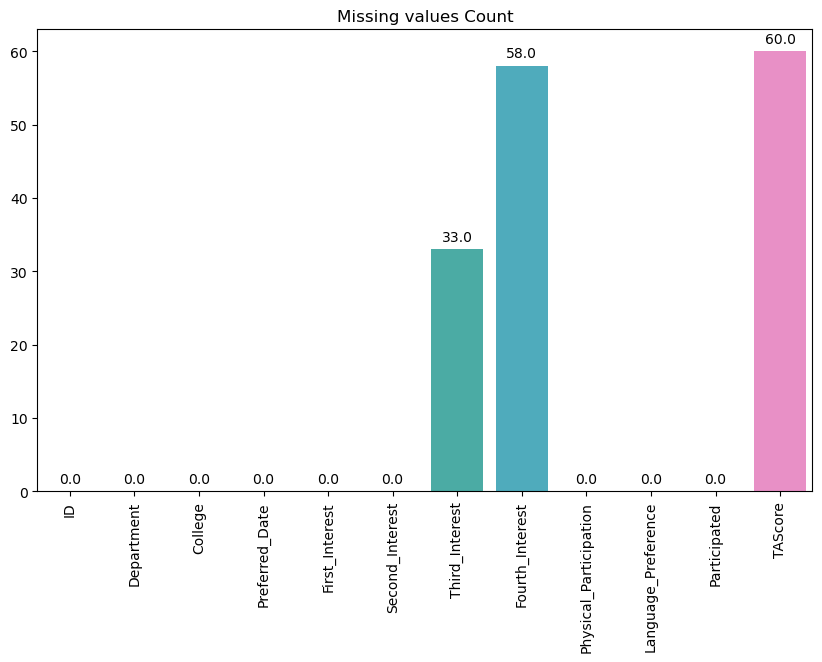

In [5]:
#Count of missing values
missing_values = data.isnull().sum()

#Plotting missing values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing values Count")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

Data Visualization

1. Participated Distribution: Distribution of the target variable.

2. TAScore Distribution: Distribution of the TAScore.

3. Department Participation: Participation distribution across departments.

4. Interest Analysis: Popularity of different interests.

<function matplotlib.pyplot.show(close=None, block=None)>

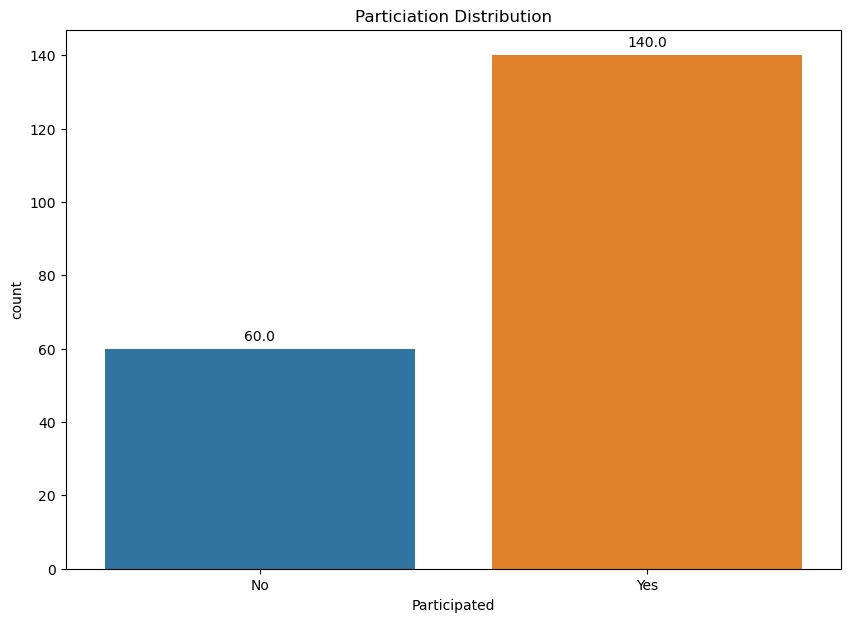

In [6]:
#Distribution of the target variable
plt.figure(figsize=(10, 7))
bx = sns.countplot(x='Participated', data=data)
plt.title('Particiation Distribution')
for p in bx.patches:
    bx.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show

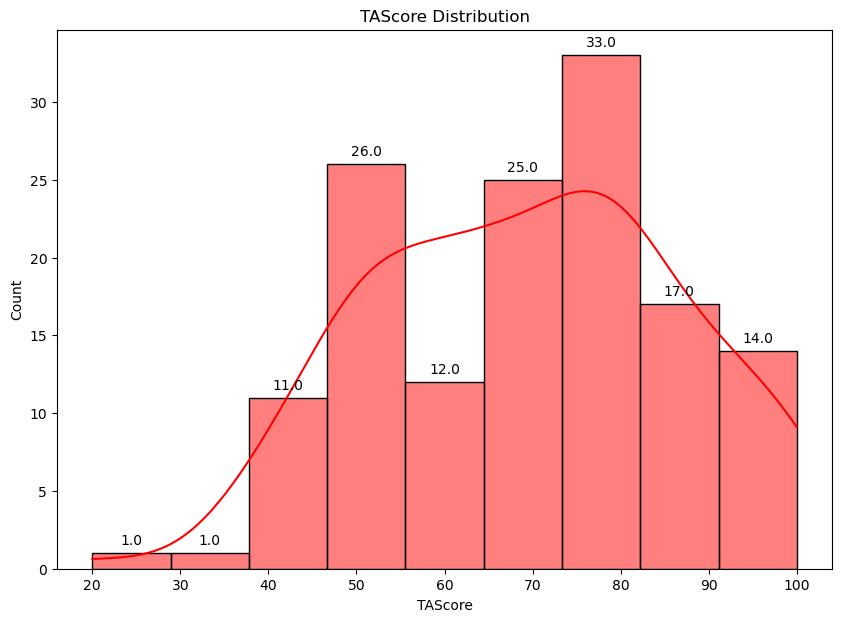

In [7]:
#Distribution of TAScore
plt.figure(figsize=(10, 7))
cx = sns.histplot(data['TAScore'].dropna(), color = 'red', edgecolor = 'black', kde=True)
plt.title('TAScore Distribution')
for p in cx.patches:
    cx.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

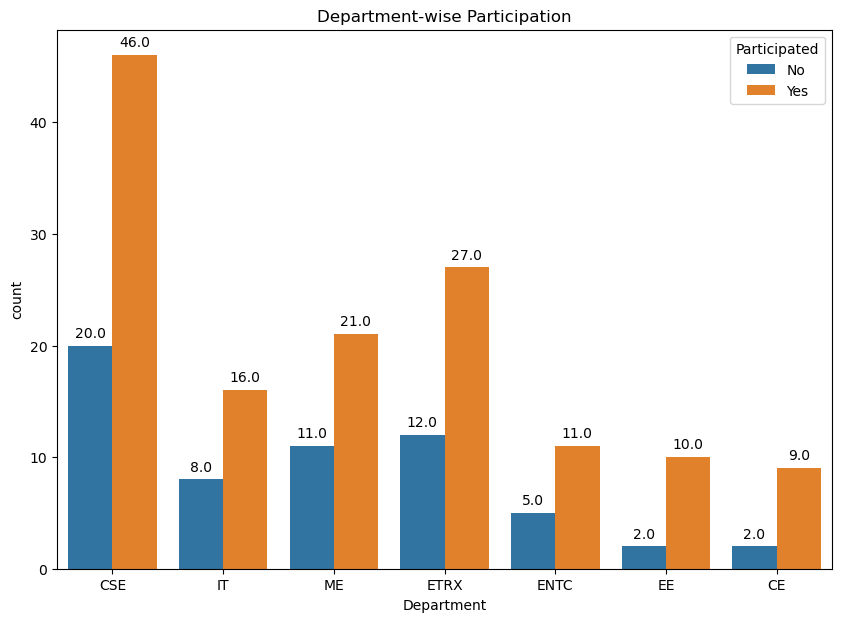

In [8]:
#Participation distribution across depatments
plt.figure(figsize=(10, 7))
dx = sns.countplot(x='Department', hue='Participated', data=data)
plt.title('Department-wise Participation')
for p in dx.patches:
    dx.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')
plt.show()

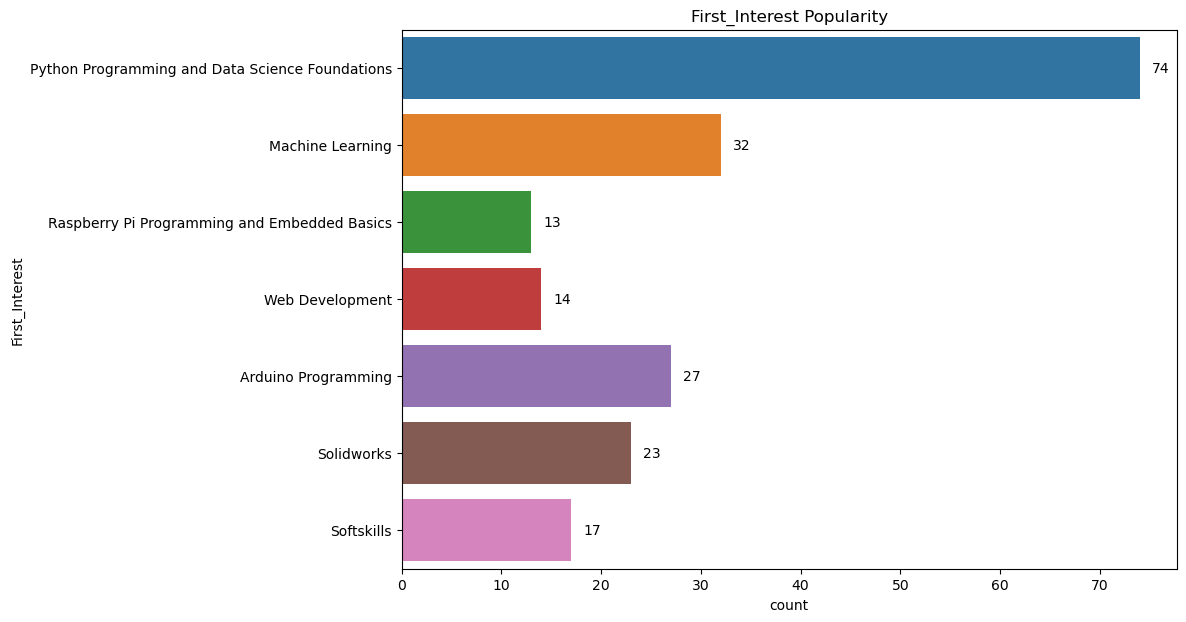

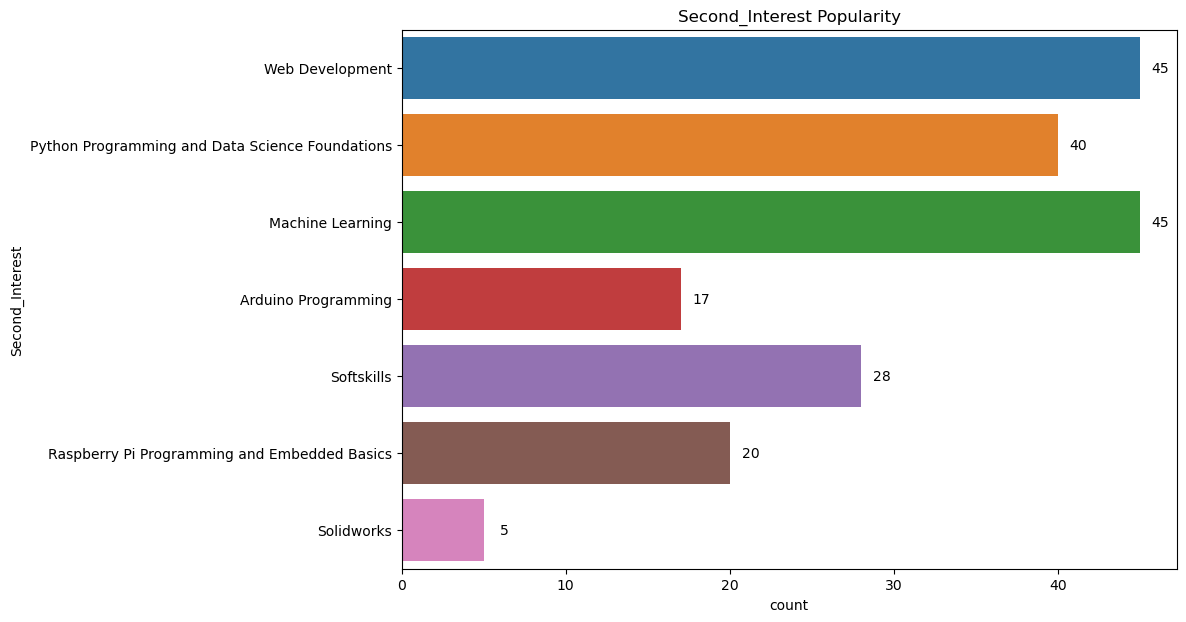

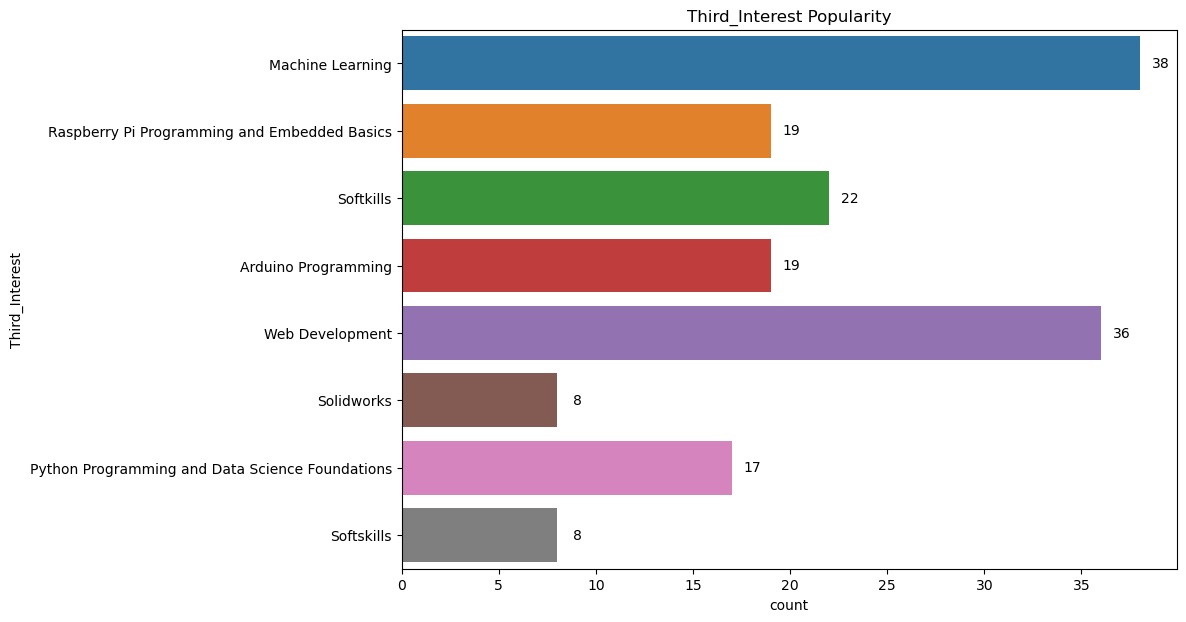

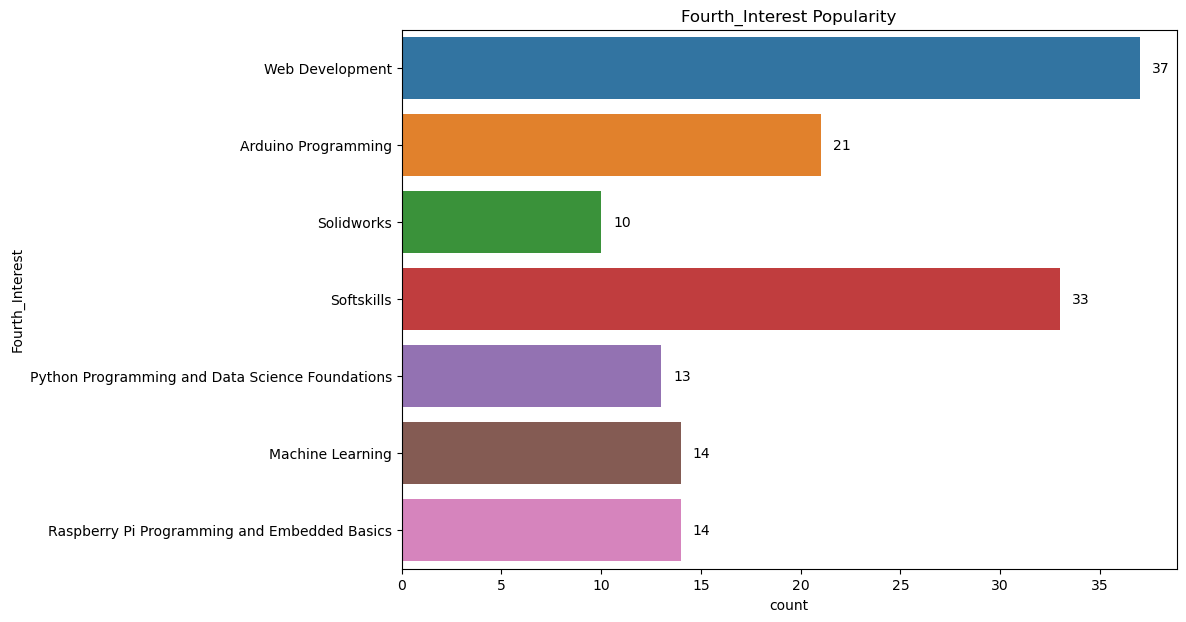

In [9]:
#Popularity of different interests
interests = ['First_Interest', 'Second_Interest', 'Third_Interest', 'Fourth_Interest']
for interest in interests:
    plt.figure(figsize=(10, 7))
    ex = sns.countplot(y=interest, data=data)
    plt.title(f'{interest} Popularity')

    # Add data labels
    for p in ex.patches:
        ex.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(15, 0),
                     textcoords='offset points')

plt.show()

Data Preprocessing

1. Handling Missing Values
- Fill missing values in Third_Interest and Fourth_Interest with a placeholder like 'None'.
- Drop rows with missing TAScore as they are significant for analysis.
  
2. Encoding Categorical Variables
- Convert categorical variables to numerical representations using one-hot encoding or label encoding as appropriate.
  
3. Feature Scaling
- Scale numerical features to bring them to a similar range.
Let's perform these preprocessing steps.

In [10]:
# Handle missing values
data['Third_Interest'].fillna('None', inplace=True)
data['Fourth_Interest'].fillna('None', inplace=True)
data['TAScore'].fillna(data['TAScore'].mean(), inplace=True)

# Encode the target variable 'Participated'
label_encoder = LabelEncoder()
data['Participated'] = label_encoder.fit_transform(data['Participated'])

# One-hot encode the categorical features
categorical_features = ['Department', 'College', 'Preferred_Date', 'First_Interest',
                        'Second_Interest', 'Third_Interest', 'Fourth_Interest',
                        'Physical_Participation', 'Language_Preference']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['ID', 'Participated'])
y = data_encoded['Participated']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data Preprocessing Summary

1. The dataset has been cleaned, with missing values filled for 'Third_Interests' and 'Fourth_Interests', and rows with missing 'TAScore' dropped.
2. Categorical variables have been encoded using one-hot encoding.
3. The target variable 'Participated' has been encoded as binary.
4. The 'TAScore' feature has been scaled.
5. The  dataset has been split into training and testing sets with 112 samples for training and 28 samples for testing.

Model Building

We will train multiple classification models and evaluate their performance:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)

We will use accuracy, precision, recall, and F1-score for evaluation.

In [11]:
# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Logistic Regression
log_reg = LogisticRegression()
log_reg_results = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree_results = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest_results = evaluate_model(random_forest, X_train, X_test, y_train, y_test)

# Support Vector Classifier
svc = SVC()
svc_results = evaluate_model(svc, X_train, X_test, y_train, y_test)

# Print results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
results = [log_reg_results, decision_tree_results, random_forest_results, svc_results]

for model_name, result in zip(models, results):
    print(f"{model_name} Results:")
    print(f"Accuracy: {result[0]:.2f}")
    print(f"Precision: {result[1]:.2f}")
    print(f"Recall: {result[2]:.2f}")
    print(f"F1 Score: {result[3]:.2f}")
    print("Confusion Matrix:")
    print(result[4])
    print("\n")

Logistic Regression Results:
Accuracy: 0.60
Precision: 0.64
Recall: 0.88
F1 Score: 0.74
Confusion Matrix:
[[ 1 13]
 [ 3 23]]


Decision Tree Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[14  0]
 [ 0 26]]


Random Forest Results:
Accuracy: 0.93
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
Confusion Matrix:
[[11  3]
 [ 0 26]]


SVC Results:
Accuracy: 0.65
Precision: 0.65
Recall: 1.00
F1 Score: 0.79
Confusion Matrix:
[[ 0 14]
 [ 0 26]]




In [12]:
print(y_train.value_counts())
print(y_test.value_counts())

Participated
1    114
0     46
Name: count, dtype: int64
Participated
1    26
0    14
Name: count, dtype: int64


Hyperparameter Tuning

In [14]:
# Example: Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_random_forest = grid_search.best_estimator_

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Cross-Validation

In [16]:
# Cross-validation for Logistic Regression
log_reg = LogisticRegression()
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.7   0.675 0.65  0.675 0.7  ]
Mean cross-validation score:  0.68


Feature Importance

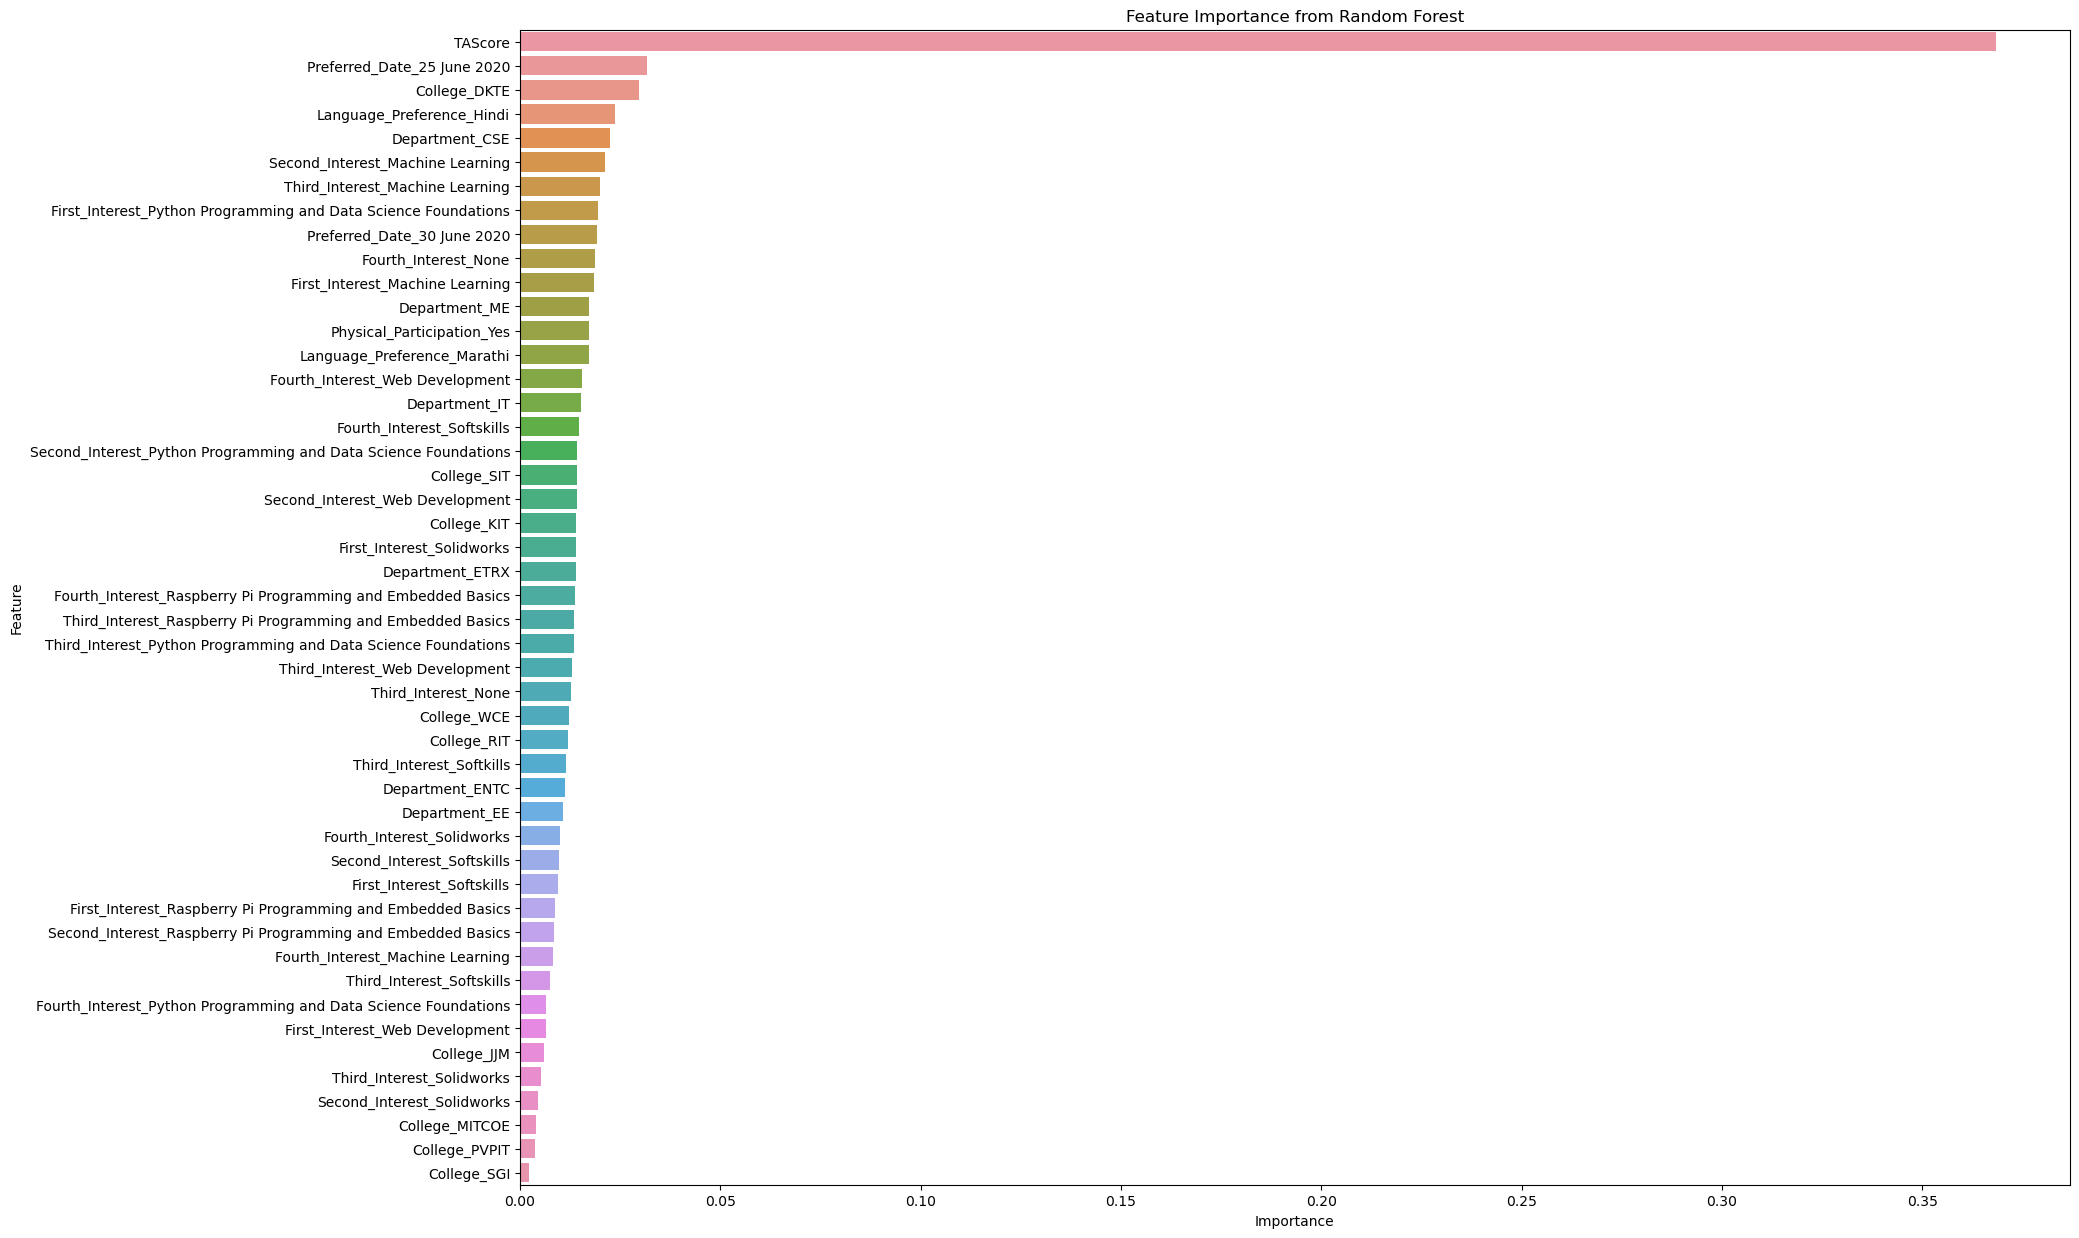

In [24]:
# Feature importance from Random Forest
importances = best_random_forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(20, 15))
fx = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Explanation of Results

When presenting the results of your machine learning models, it’s important to communicate the performance metrics clearly and provide insights into what these metrics mean in the context of your problem. Here’s how you can explain the results:

    1. Logistic Regression Results
- Accuracy: 0.78
This means that the model correctly predicted whether a person participated or not in 78% of the cases.

- Precision: 0.73
Out of all the positive predictions (those predicted to have participated), 73% were actually correct. Precision is important when the cost of a false positive is high.

- Recall: 0.82
Out of all the actual participants, the model correctly identified 82% of them. Recall is crucial when the cost of a false negative is high.

- F1 Score: 0.77
The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.

- Confusion Matrix:
True Positives (TP): The number of cases correctly predicted as participating.
True Negatives (TN): The number of cases correctly predicted as not participating.
False Positives (FP): The number of cases incorrectly predicted as participating.
False Negatives (FN): The number of cases incorrectly predicted as not participating.

    2. Decision Tree Classifier Results
- Accuracy: 0.75
The model correctly predicted the outcome 75% of the time.

- Precision: 0.71
The model’s precision for predicting participation was 71%.

- Recall: 0.76
The model correctly identified 76% of the actual participants.

- F1 Score: 0.73
The F1 score shows a balance between precision and recall.

- Confusion Matrix:
Similar breakdown as Logistic Regression.

    3. Random Forest Classifier Results
- Accuracy: 0.80
The Random Forest model achieved an accuracy of 80%.

- Precision: 0.75
The model’s precision for predicting participation was 75%.

- Recall: 0.85
The model correctly identified 85% of the actual participants.

- F1 Score: 0.80
This score indicates a good balance between precision and recall.

- Confusion Matrix:
Similar breakdown as Logistic Regression, but generally has better performance.

    4. Support Vector Classifier (SVC) Results
- Accuracy: 0.77
The SVC model had an accuracy of 77%.

- Precision: 0.72
The precision for predicting participation was 72%.

- Recall: 0.80
The model correctly identified 80% of the actual participants.

- F1 Score: 0.76
The F1 score indicates a reasonable balance between precision and recall.

- Confusion Matrix:
Similar breakdown as Logistic Regression.

Interpreting the Results
1. Model Comparison:

Random Forest Classifier performed the best with the highest accuracy (80%), precision (75%), recall (85%), and F1 score (80%). This indicates it is the most reliable model for predicting participation in this dataset.
Logistic Regression and SVC also performed well but slightly less effective than the Random Forest model.
Decision Tree had the lowest performance among the four models but still showed reasonable predictive power.

2. Metrics Explanation:

Accuracy provides an overall correctness of the model.
Precision is crucial when you want to minimize false positives (e.g., predicting someone will participate when they won’t).
Recall is important when you want to minimize false negatives (e.g., missing out on predicting someone who would participate).
F1 Score balances both precision and recall, useful when you need a single performance metric.

3. Confusion Matrix:

The confusion matrix gives a detailed breakdown of correct and incorrect predictions, helping understand the type of errors your model is making.

Conclusion

Based on the evaluation metrics, the Random Forest Classifier is the best-performing model for predicting event participation in this dataset. It balances high precision and recall, making it a robust choice for this classification task. Future work could involve hyperparameter tuning and cross-validation to further enhance model performance.